# Introduction to pandas Data Structures
To get started with pandas, you will need to get comfortable with its two workhorse
data structures:<b> Series and DataFrame</b>. While they are not a universal solution for
every problem, they provide a solid, easy-to-use basis for most applications.

# Pandas Series Object

<b>A Series</b> is the primary building block of pandas.

Series represents a one-dimensional labeled indexed array based on the NumPy ndarray.

Like an array, a Series can hold zero or more values of any single data type

# Creating Series
A Series can be created and initialized by passing either a <b>scalar value,
a NumPy ndarray, a Python list, or a Python Dict</b> as the data parameter of
the Series constructor. This is the default parameter and does not need to
be specified if it is the first item.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# create one item Series
s1 = pd.Series(2)
s1

In [ ]:
# create a series of multiple items from a list
s2 = pd.Series([1, 2, 3, 4, 5])
s2

In [ ]:
# get the values in the Series
s2.values

In [ ]:
# get the index of the Series
s2.index

In [ ]:
# explicitly create an index
# index is alpha, not integer
s3 = pd.Series([1, 2, 3], index=['a', 'b', 'c']) 
s3

In [ ]:
# lookup by label value, not integer position
print(f"vlaue by label 's3['c']' is {s3['c']} and vlaue by index 's3[2] 'is {s3[2]}")
# access both by label and index

In [ ]:
# create Series from an existing index
# scalar value with be copied at each index label
s4 = pd.Series(["A","B","C","D","E"], index=s2.index)
s4

In [ ]:
# create Series from dict
s4 = pd.Series({'a': 1, 'b': 2, 'c': 3, 'd': 4})
s4

In [ ]:
s5 = pd.Series(np.array([22,33,44,55,66]))
s5

<h3>Size, shape, uniqueness, and counts of values</h3>

In [ ]:
# example series, which also contains a NaN
s = pd.Series([0, 1, 1, 2, 3, 4, 4, 5, 6, 7,np.nan]) # numpy nan property is used here to create an NaN 
s

In [ ]:
print(len(s))
print(s.size)
print(s.shape)
print(s.count()) # count return not null values
print(s.unique())
print(s.value_counts())

<h3>Peeking at data with heads, tails, and take</h3>

In [ ]:
# first five
s.head()

In [ ]:
# first three
s.head(n = 3) # s.head(3) is equivalent

In [ ]:
# last five
s.tail()

In [ ]:
# last 3
s.tail(n = 3) # equivalent to s.tail(3)

In [ ]:
#The .take() method will return the rows in a series that correspond to the zero-based positions:

# only take specific items

s.take([9, 3, 9])

# Looking up values in Series

In [ ]:
# single item lookup

print(s3)
s3['a']

In [ ]:
#Accessing this Series using an integer value will perform a zero-based position lookup of the value:

# lookup by position since the index is not an integer
s3[1]

In [ ]:
# multiple items
s3[['c', 'a']]

In [ ]:
# series with an integer index, but not starting with 0
s5 = pd.Series([1, 2, 3], index=[2, 3, 4])  
s5

# label-based lookup versus position-based lookup

In [ ]:
s5[2]  # 2 is considered as label based look up
       # coz label also has 2 init

In [ ]:
s5[0]   # now see in this case we have integer label lookup,position lookup is not working

In [ ]:
s5.loc[2]  # loc also works on label based look up

In [ ]:
s5.iloc[2]  #iLoc forcefully works on position based look up even you dont specify position based index

In [ ]:
# multiple items by label (loc)
s5.loc[[4, 3]]

In [ ]:
s5[[0,2]]

In [ ]:
s5.iloc[[0,2]]

In [ ]:
s5.iloc[[0,2,3]]  # integr location will throw exception

# Alignment via index labels

A fundamental difference between a NumPy ndarray and a pandas Series is the
ability of a Series to automatically align data from another Series based on label
values before performing an operation.

In [ ]:
s6 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s6

In [ ]:
s7 = pd.Series([4, 3, 2, 1], index=['d', 'c', 'b', 'a'])
s7

In [ ]:
# add them
s6 + s7    #it first alligns the data as per label then performs operation

 <h3>Nan + number = NaN </h3>      (NaN added to a number results in NaN)
    
<h3>number + NaN = NaN</h3>        (Number added to a Nan results in NaN)


In [ ]:
s8 = pd.Series({'a': 1, 'b': 2, 'c': 3, 'd': 5})
s8

In [ ]:
s9 = pd.Series({'b': 6, 'c': 7, 'd': 9, 'e': 10})
s9

In [ ]:
# NaN's result for a and e
# demonstrates alignment
s8 + s9

In [ ]:
s10 = pd.Series([1.0, 2.0, 3.0], index=['a', 'a', 'b'])
s10

In [ ]:
s11 = pd.Series([4.0, 5.0, 6.0], index=['a', 'a', 'c'])
s11

When the two Series objects are added (or any other operation performed), the
resulting Series has four 'a' index labels.

In [ ]:
s10 + s11

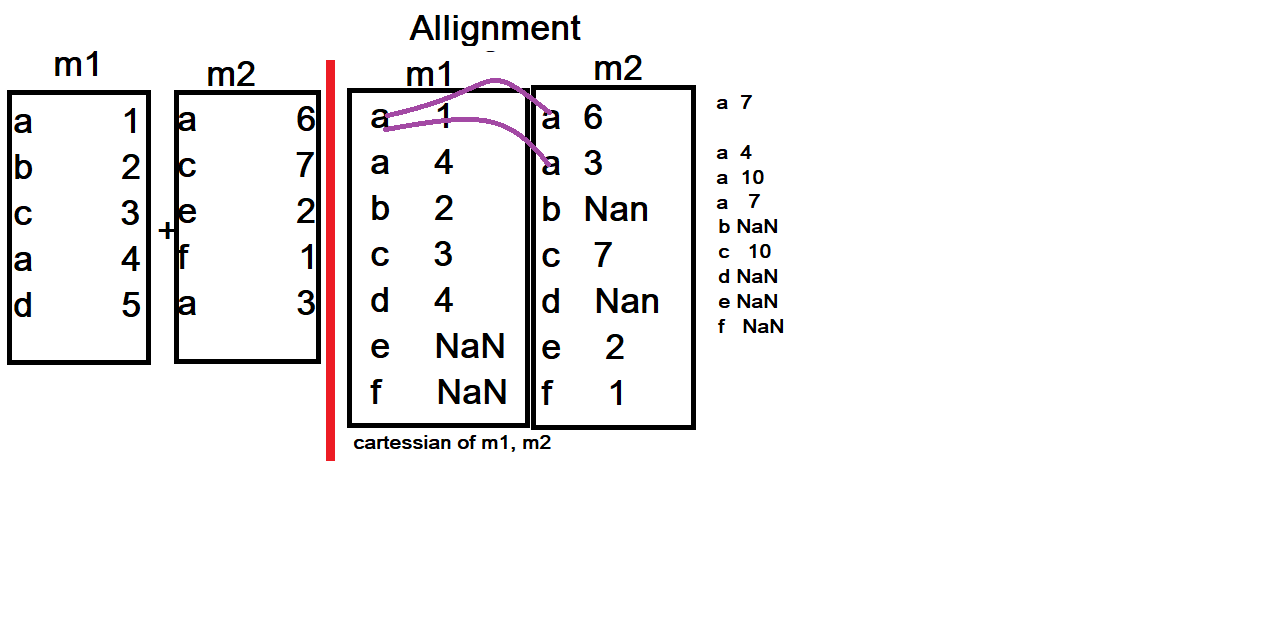

# The special case of Not-A-Number (NaN)

In [ ]:
# mean of numpy array values
nda = np.array([1, 2, 3, 4, 5])
nda.mean()

In [ ]:
# mean of numpy array values with a NaN
nda = np.array([1, 2, 3, 4, np.NaN])
nda.mean()

In [ ]:
# ignores NaN values
s = pd.Series(nda)      
s.mean()

In [ ]:
# handle NaN values like NumPy
s.mean(skipna=False)

# Boolean Selection

In [ ]:
# which rows have values that are > 5?
s = pd.Series(np.arange(0, 10))

s > 5

In [ ]:
# select rows where values are > 5
logicalResults = s > 5
s[logicalResults]

In [ ]:
# a little shorter version
s[s > 5]

In [ ]:
# commented as it throws an exception
# s[s > 5 and s < 8]

# correct syntax
s[(s > 5) & (s < 8)]

In [ ]:
pd.Series([True, False, False, True, True]).all(),pd.Series([True, False, False, True, True]).any()

In [ ]:
(np.array([1,0,1,1])).sum()

In [ ]:
# are all items >= 0?
(s >= 0).all()

In [ ]:
s < 2

In [ ]:
# any items < 2?
s[s < 2].any()

In [ ]:
# how many values < 2?
(s < 2).sum()

# Reindexing a Series

Reindexing in pandas is a process that makes the data in a Series or DataFrame
match a given set of labels. This is core to the functionality of pandas as it enables
label alignment across multiple objects, which may originally have different
indexing schemes.
This process of performing a reindex includes the following steps:
1. Reordering existing data to match a set of labels.
2. Inserting NaN markers where no data exists for a label.
3. Possibly, filling missing data for a label using some type of logic (defaulting
to adding NaN values).

In [ ]:
# sample series of five items
s = pd.Series(np.random.randn(5))
s

In [ ]:
# change the index
s.index = ['a', 'b', 'c', 'd', 'e']
s

let's examine a slightly more practical example. The following code concatenates
two Series objects resulting in duplicate index labels, which may not be desired in the
resulting Series:

In [ ]:
# concat copies index values verbatim (as it is),
# potentially making duplicates since we have some or all label index same
np.random.seed(123456)
s1 = pd.Series(np.random.randn(3))
s2 = pd.Series(np.random.randn(3))
combined = pd.concat([s1, s2])
combined

In [ ]:
# reset the index so that duplication of index may be removed
combined.index = np.arange(0, len(combined))
combined

Reindexing using the .index property in-place modifies the Series.

# reindex() method
Greater flexibility in creating a new index is provided using the .reindex() method.
An example of the flexibility of .reindex() over assigning the .index property
directly is that the list provided to .reindex() can be of a different length than the
number of rows in the Series:

In [ ]:
np.random.seed(123456)
s1 = pd.Series(np.random.randn(4), ['a', 'b', 'c', 'd'])
print(s1)
# reindex with different number of labels
# results in dropped rows and/or NaN's


s2 = s1.reindex(['a', 'c', 'g'])
s2

Things to be noted: 
    1. reindex() donot re-index inplace, it will return a new series original will not be modified
    2. if any index not matching the previous index will be assigned NaN
    3. The index present in previous indexes, if not included in re-index 
        then the row will not be added in new series. 

In [ ]:
combined.reindex([9,5,3,4,0,1,2,6])  # not in place

In [ ]:
combined   # last indexing is still there.

Reindexing is also useful when you want to align two Series to perform an
operation on matching elements from each series; however, for some reason,
the two Series had index labels that will not initially align.
The following example demonstrates this, where the first Series has indexes as
sequential integers, but the second has a string representation of what would be
the same values:


In [ ]:
# different types for the same values of labels
# causes big trouble
s1 = pd.Series([0, 1, 2], index=[0, 1, 2])
s2 = pd.Series([3, 4, 5], index=['0', '1', '2'])
s1 + s2

you can easily guess what had happened here.

all values are NaN because the operation tries to add the item in the
first series with the integer label 0, which has a value of 0, but can't find the
item in the other series and therefore, the result is NaN (and this fails six times
in this case).

<h5>Once this situation is identified:</h5>
it becomes a fairly trivial situation to fix by
reindexing the second series:

In [ ]:
# reindex by casting the label types and we will get the desired result

s2.index = s2.index.values.astype(int)
s1 + s2

Overriding the default action of inserting <b>NaN</b> as a missing value during reindexing can
be changed by using the <b>fill_value</b> parameter of the method.

In [ ]:
# fill with 0 instead of NaN
s2 = s.copy()
s2

In [ ]:
s2_reindexed = s2.reindex(['a', 'f'], fill_value=0)
s2_reindexed

<h3>ffill, bfill, & nearest</h3>

In [ ]:
# create example to demonstrate fills
s3 = pd.Series(['red', 'green', 'blue', ], index=[0, 8, 10])
s3

In [ ]:
# forward fill example
s3.reindex(np.arange(0,15), method='ffill')

In [ ]:
# backwards fill example
s3.reindex(np.arange(0,7), method='bfill')

In [ ]:
s3.reindex(np.arange(0,10), method='nearest') #nearest: use nearest valid observations to fill gap

# Slicing a Series

In [ ]:
# a Series to use for slicing
# using index labels not starting at 0 to demonstrate
# position based slicing

s = pd.Series(np.arange(100, 110), index=np.arange(10, 20))

# remember we pro 
s

In [ ]:
print(s[0:6:2])  # [startofrow:endofrow:step]

# # equivalent to
s.iloc[[0, 2, 4]]

In [ ]:
# first five by slicing, same as .head(5)
s[:5]

# Missing Data in Series

NaN values represent data is missing in the series


In [ ]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

In [ ]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

obj4 = pd.Series(sdata, index=states)
obj4

In [ ]:
pd.isnull(obj4)  # obj4.isnull()

In [ ]:
pd.notnull(obj4)  #obj4.notnull()

In [ ]:
obj4.name = 'population'
obj4.index.name="state"
obj4

# The pandas DataFrame Object

A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string,
boolean, etc.). 

<h4>Creating a DataFrame from scratch</h4>

In [128]:
# create a DataFrame from a 2-d ndarray
import pandas as pd
import numpy as np

df = pd.DataFrame(np.array([[10, 11, 12, 13], [20, 21, 22, 23]]))
df

# default row and columns indexes

,0,1,2,3
0,10,11,12,13
1,20,21,22,23


In [129]:
# create a DataFrame for a list of Series objects

df1 = pd.DataFrame([pd.Series(np.arange(10, 15)),
                    
                    pd.Series(np.arange(15, 20))])
df1
# default row and columns indexes

,0,1,2,3,4
0,10,11,12,13,14
1,15,16,17,18,19


In [130]:
# create a DataFrame with two Series objects
# and a dictionary
s1 = pd.Series(np.arange(1, 6, 1))

s2 = pd.Series(np.arange(6, 11, 1))

df2= pd.DataFrame({'boys': s1, 'girls': s2})
df2

,boys,girls
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


In [131]:
data = {'name':["Asad","Saad","Fahad", 'Ali'], 'age':[23,34,23,21], "grades":["A","B","A","B"]}
data = pd.DataFrame(data)
data

,name,age,grades
0,Asad,23,A
1,Saad,34,B
2,Fahad,23,A
3,Ali,21,B


In [132]:
# specify column names
df3 = pd.DataFrame(np.array([[10, 11], [20, 21]]),columns=['apples', 'oranges'])
df3

,apples,oranges
0,10,11
1,20,21


In [133]:
# create a DataFrame with named columns and rows

df4 = pd.DataFrame(np.array([[10, 11, 12, 13], [20, 21, 22, 23]]), 
                   index=['apples', 'oranges'],
                   columns=['Mon', 'Tue','Wed', 'Thu'])
df4

,Mon,Tue,Wed,Thu
apples,10,11,12,13
oranges,20,21,22,23


In [134]:
# demonstrate alignment during creation

s3 = pd.Series(np.arange(12, 14), index=[1, 2])

df5 = pd.DataFrame({'c1': s1, 'c2': s2, 'c3': s3})
df5

,c1,c2,c3
0,1,6,NaN
1,2,7,12.0
2,3,8,13.0
3,4,9,NaN
4,5,10,NaN


In [ ]:
# Examples of creating data frames

In [135]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year':  [2000, 2001, 2002, 2001, 2002, 2003],
        'pop':   [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [136]:
pd.DataFrame(frame, columns=['year', 'state', 'pop']) # inplace nahi hoga 

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [137]:
frame.year

0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64

In [138]:
frame['pop']

0    1.5
1    1.7
2    3.6
3    2.4
4    2.9
5    3.2
Name: pop, dtype: float64

In [139]:
# If you pass a column that isn’t contained in the dict(debt), it will appear with missing values
# in the result:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                              index=['one', 'two', 'three', 'four','five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [140]:
frame2.debt = 100
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,100
two,2001,Ohio,1.7,100
three,2002,Ohio,3.6,100
four,2001,Nevada,2.4,100
five,2002,Nevada,2.9,100
six,2003,Nevada,3.2,100


In [141]:
frame2['debt']=np.arange(6)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0
two,2001,Ohio,1.7,1
three,2002,Ohio,3.6,2
four,2001,Nevada,2.4,3
five,2002,Nevada,2.9,4
six,2003,Nevada,3.2,5


In [142]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])

In [48]:
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [143]:
#Adding more columns to dataframe

frame2['eastern'] = frame2.state == 'Ohio'# true false
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,0,True
two,2001,Ohio,1.7,1,True
three,2002,Ohio,3.6,2,True
four,2001,Nevada,2.4,3,False
five,2002,Nevada,2.9,4,False
six,2003,Nevada,3.2,5,False


In [144]:
frame2['greaterThan2']= frame2['pop'] > 2
frame2

,year,state,pop,debt,eastern,greaterThan2
one,2000,Ohio,1.5,0,True,False
two,2001,Ohio,1.7,1,True,False
three,2002,Ohio,3.6,2,True,True
four,2001,Nevada,2.4,3,False,True
five,2002,Nevada,2.9,4,False,True
six,2003,Nevada,3.2,5,False,True


In [145]:
del frame2['eastern']

In [54]:
frame2

,year,state,pop,debt,greaterThan2
one,2000,Ohio,1.5,NaN,False
two,2001,Ohio,1.7,-1.2,False
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,True
five,2002,Nevada,2.9,-1.7,True
six,2003,Nevada,3.2,NaN,True


In [146]:
data = {'name':["Asad","Saad","Fahad", 'Ali'], 
        'age':[23,34,23,21], 
        'AiforEveryONe':[89,78,90,98],
        'python':[78,89,87,89],
        'git': [90,98,87,86],
        'numpy':[98,87,98,99]       }
        
data = pd.DataFrame(data)
data

,name,age,AiforEveryONe,python,git,numpy
0,Asad,23,89,78,90,98
1,Saad,34,78,89,98,87
2,Fahad,23,90,87,87,98
3,Ali,21,98,89,86,99


In [147]:
data['Total'] = data['AiforEveryONe']+data['python']+data['git']+data['numpy']
data['percent'] = data['Total']/400*100


In [63]:
#Another common form of data is a nested dict of dicts:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       
       'Ohio':   {2000: 1.5, 2001: 1.7, 2002: 3.6}}
df3 =pd.DataFrame(pop)
df3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


<b>If the nested dict is passed to the DataFrame, pandas will interpret the outer dict keys
as the columns and the inner keys as the row indices</b>

In [148]:
df3.T

,0,1
apples,10,20
oranges,11,21


In [65]:
df3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [149]:
pop1 =pd.DataFrame(pop, index=[2001, 2002, 2003])
pop1

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [151]:
pdata = {'Ohio': df3['Ohio'][:-1],
         
        'Nevada': df3['Nevada'][:2]
        }

pd.DataFrame(pdata)

KeyError: 'Ohio'

In [152]:
df3.index.name = 'year'
df3.columns.name = 'state'

df3

state,apples,oranges
year,,
0,10,11
1,20,21


# Index Objects

pandas’s Index objects are responsible for holding the axis labels and other metadata
(like the axis name or names). Any array or other sequence of labels you use when
constructing a Series or DataFrame is internally converted to an Index:

In [71]:

obj = pd.Series(range(3), index=['a', 'b', 'c'])

In [73]:
index =obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [74]:
index[1:]

Index(['b', 'c'], dtype='object')

In [75]:
index[1] = 'd'  # indices are immutable

TypeError: Index does not support mutable operations

In [77]:
labels = pd.Index(["a","b","c","d","e","f"]) # creatind an ndarray that is immutable
                                # coz created via Index function and index are immutable

In [78]:
labels

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')

In [79]:
labels[0]="z"

TypeError: Index does not support mutable operations

In [80]:
print(frame)

    state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
5  Nevada  2003  3.2


In [81]:
frame.index=labels
frame

,state,year,pop
a,Ohio,2000,1.5
b,Ohio,2001,1.7
c,Ohio,2002,3.6
d,Nevada,2001,2.4
e,Nevada,2002,2.9
f,Nevada,2003,3.2


In [82]:
frame.index   # is index type object

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')

In [83]:
frame.columns  # is also inde type object

Index(['state', 'year', 'pop'], dtype='object')

# Essential Functionality

In [84]:
frame2['debt']=np.arange(6)
print("The frame is", end="\n\n")

print(frame2,end="\n\n")

print("The row indices are", end="\n\n")

print(frame2.index,end="\n\n")

print("The col indeces are",end="\n\n")

print(frame2.columns)

The frame is

       year   state  pop  debt  greaterThan2
one    2000    Ohio  1.5     0         False
two    2001    Ohio  1.7     1         False
three  2002    Ohio  3.6     2          True
four   2001  Nevada  2.4     3          True
five   2002  Nevada  2.9     4          True
six    2003  Nevada  3.2     5          True

The row indices are

Index(['one', 'two', 'three', 'four', 'five', 'six'], dtype='object')

The col indeces are

Index(['year', 'state', 'pop', 'debt', 'greaterThan2'], dtype='object')


In [85]:
######by default row are reindexed via reindex function#####

reindex_frame = frame2.reindex(['five','two', 'three', 'six', 'four','one','seven'])


In [86]:
reindex_frame

,year,state,pop,debt,greaterThan2
five,2002.0,Nevada,2.9,4.0,True
two,2001.0,Ohio,1.7,1.0,False
three,2002.0,Ohio,3.6,2.0,True
six,2003.0,Nevada,3.2,5.0,True
four,2001.0,Nevada,2.4,3.0,True
one,2000.0,Ohio,1.5,0.0,False
seven,NaN,NaN,NaN,NaN,NaN


The columns can be reindexed with the columns keyword:

In [89]:
reindex_frame = frame2.reindex(columns=['pop','year','imports', 'debt', 'state',"exports" ])

In [90]:
reindex_frame

,pop,year,imports,debt,state,exports
one,1.5,2000,NaN,0,Ohio,NaN
two,1.7,2001,NaN,1,Ohio,NaN
three,3.6,2002,NaN,2,Ohio,NaN
four,2.4,2001,NaN,3,Nevada,NaN
five,2.9,2002,NaN,4,Nevada,NaN
six,3.2,2003,NaN,5,Nevada,NaN


# Dropping Entries from an Axis


In [91]:
reindex_frame

,pop,year,imports,debt,state,exports
one,1.5,2000,NaN,0,Ohio,NaN
two,1.7,2001,NaN,1,Ohio,NaN
three,3.6,2002,NaN,2,Ohio,NaN
four,2.4,2001,NaN,3,Nevada,NaN
five,2.9,2002,NaN,4,Nevada,NaN
six,3.2,2003,NaN,5,Nevada,NaN


In [96]:
row_dropped_frame = reindex_frame.drop(['three','six'])   # not dropping inplace
                        # by default dropping row labels axis =0
row_dropped_frame

,pop,year,imports,debt,state,exports
one,1.5,2000,NaN,0,Ohio,NaN
two,1.7,2001,NaN,1,Ohio,NaN
four,2.4,2001,NaN,3,Nevada,NaN
five,2.9,2002,NaN,4,Nevada,NaN


In [97]:
col_dropped_frame = reindex_frame.drop(['imports','exports'],axis=1)
col_dropped_frame

,pop,year,debt,state
one,1.5,2000,0,Ohio
two,1.7,2001,1,Ohio
three,3.6,2002,2,Ohio
four,2.4,2001,3,Nevada
five,2.9,2002,4,Nevada
six,3.2,2003,5,Nevada


# Another Example:

In [98]:
index = ['Firefox', 'Chrome', 'Safari', 'IE10', 'Konqueror']
df = pd.DataFrame({
                      'http_status': [200,200,404,404,301],
                      'response_time': [0.04, 0.02, 0.07, 0.08, 1.0]},
                                                                      index=index)
df

,http_status,response_time
Firefox,200,0.04
Chrome,200,0.02
Safari,404,0.07
IE10,404,0.08
Konqueror,301,1.00


Create a new index and reindex the dataframe.
By default values in the new index that do not have corresponding records in the dataframe are assigned ``NaN``.



In [99]:
new_index= ['Safari', 'Iceweasel', 'Comodo Dragon', 'IE10','Chrome']
df.reindex(new_index)

,http_status,response_time
Safari,404.0,0.07
Iceweasel,NaN,NaN
Comodo Dragon,NaN,NaN
IE10,404.0,0.08
Chrome,200.0,0.02


We can fill in the missing values by passing a value to the keyword ``fill_value``. Because the index is not monotonically
increasing or decreasing, we cannot use arguments to the keyword
``method`` to fill the ``NaN`` values.

In [100]:
df.reindex(new_index, fill_value=0)

,http_status,response_time
Safari,404,0.07
Iceweasel,0,0.00
Comodo Dragon,0,0.00
IE10,404,0.08
Chrome,200,0.02


In [101]:
df.reindex(new_index, fill_value='missing')

,http_status,response_time
Safari,404,0.07
Iceweasel,missing,missing
Comodo Dragon,missing,missing
IE10,404,0.08
Chrome,200,0.02


In [102]:
#We can also reindex the columns.

df.reindex(columns=['http_status', 'user_agent'])

,http_status,user_agent
Firefox,200,NaN
Chrome,200,NaN
Safari,404,NaN
IE10,404,NaN
Konqueror,301,NaN


In [103]:
# Or we can use "axis-style" keyword arguments
df.reindex(['http_status', 'user_agent'], axis="columns")

,http_status,user_agent
Firefox,200,NaN
Chrome,200,NaN
Safari,404,NaN
IE10,404,NaN
Konqueror,301,NaN


To further illustrate the filling functionality in
``reindex``, we will create a dataframe with a
monotonically increasing index (for example, a sequence
of dates)

In [104]:
date_index = pd.date_range('1/1/2010', periods=6, freq='D')

df2 = pd.DataFrame({"prices": [100, 101, np.nan, 100, 89, 88]},index=date_index)
df2

,prices
2010-01-01,100.0
2010-01-02,101.0
2010-01-03,NaN
2010-01-04,100.0
2010-01-05,89.0
2010-01-06,88.0


Suppose we decide to expand the dataframe to cover a wider
date range.

In [105]:
date_index2 = pd.date_range('12/29/2009', periods=10, freq='D')
df2.reindex(date_index2)

,prices
2009-12-29,NaN
2009-12-30,NaN
2009-12-31,NaN
2010-01-01,100.0
2010-01-02,101.0
2010-01-03,NaN
2010-01-04,100.0
2010-01-05,89.0
2010-01-06,88.0
2010-01-07,NaN


The index entries that did not have a value in the original data frame
(for example, '2009-12-29') are by default filled with ``NaN``.
If desired, we can fill in the missing values using one of several
options.

For example, to back-propagate the last valid value to fill the ``NaN``
values, pass ``bfill`` as an argument to the ``method`` keyword.

In [109]:
df2.reindex(date_index2, method='bfill')

,prices
2009-12-29,100.0
2009-12-30,100.0
2009-12-31,100.0
2010-01-01,100.0
2010-01-02,101.0
2010-01-03,NaN
2010-01-04,100.0
2010-01-05,89.0
2010-01-06,88.0
2010-01-07,NaN


Please note that the ``NaN`` value present in the original dataframe
(at index value 2010-01-03) will not be filled by any of the
value propagation schemes. This is because filling while reindexing
does not look at dataframe values, but only compares the original and
desired indexes. If you do want to fill in the ``NaN`` values present
in the original dataframe, use the ``fillna()`` method.


# Indexing, Selection, and Filtering

In [110]:
data = pd.DataFrame(np.arange(40).reshape((10, 4)),
    index=['Ohio', 'Colorado', 'Washington','Nebraska','Utah', 'New York','California', 'Texas', 'Georgia', 'Alaska'],
    columns=['Jan', 'Feb', 'Mar', 'Apr'])
data

,Jan,Feb,Mar,Apr
Ohio,0,1,2,3
Colorado,4,5,6,7
Washington,8,9,10,11
Nebraska,12,13,14,15
Utah,16,17,18,19
New York,20,21,22,23
California,24,25,26,27
Texas,28,29,30,31
Georgia,32,33,34,35
Alaska,36,37,38,39


In [111]:
# getting a single col
data['Jan']

Ohio           0
Colorado       4
Washington     8
Nebraska      12
Utah          16
New York      20
California    24
Texas         28
Georgia       32
Alaska        36
Name: Jan, dtype: int32

In [112]:
#getting multiple cols
data[['Jan', 'Apr']]

,Jan,Apr
Ohio,0,3
Colorado,4,7
Washington,8,11
Nebraska,12,15
Utah,16,19
New York,20,23
California,24,27
Texas,28,31
Georgia,32,35
Alaska,36,39


In [113]:
#integer based 
data[:2]  #slicing rows starts from 0 & take two rows

,Jan,Feb,Mar,Apr
Ohio,0,1,2,3
Colorado,4,5,6,7


In [115]:
#label based
data["Utah":"Texas"]  #slicing rows starts from "Utah" & goto "Texas"

,Jan,Feb,Mar,Apr
Utah,16,17,18,19
New York,20,21,22,23
California,24,25,26,27
Texas,28,29,30,31


In [116]:
data[2:6,0:2]   # Slicing Subsets of Rows and Columns either by label index 
                # or by integer indexing is not possible, we have some other sol

TypeError: '(slice(2, 6, None), slice(0, 2, None))' is an invalid key

In [117]:
data["Utah":"Texas", "Jan":'Mar']    # Slicing Subsets of Rows and Columns either by label index 
                                 # or by integer indexing isnot possible, we have some other sol

TypeError: '(slice('Utah', 'Texas', None), slice('Jan', 'Mar', None))' is an invalid key

We can select specific ranges of our data in both the row and column directions using either label or integer-based indexing.

<b>loc</b> is primarily label based indexing. Integers may be used but they are interpreted as a label.

<b>iloc</b> is primarily integer based indexing
To select a subset of rows and columns from our DataFrame, we can use the iloc method.

In [118]:
# use if loc (label based)

data.loc["Utah":"Texas", "Jan":'Mar']


,Jan,Feb,Mar
Utah,16,17,18
New York,20,21,22
California,24,25,26
Texas,28,29,30


In [119]:
#use if iloc (integer based)

data.iloc[2:6,0:2] 

,Jan,Feb
Washington,8,9
Nebraska,12,13
Utah,16,17
New York,20,21


In [154]:
a = pd.DataFrame({"p":[2,4,6]})
a.rdiv(2)   # 2/6

,p
0,1.000000
1,0.500000
2,0.333333


In [124]:
# select all the data from the month of march that have value greater than 15

data['Mar'] > 15

Ohio          False
Colorado      False
Washington    False
Nebraska      False
Utah           True
New York       True
California     True
Texas          True
Georgia        True
Alaska         True
Name: Mar, dtype: bool

In [126]:
data[data['Mar'] > 20]

,Jan,Feb,Mar,Apr
New York,20,21,22,23
California,24,25,26,27
Texas,28,29,30,31
Georgia,32,33,34,35
Alaska,36,37,38,39


In [127]:
data[data < 5] = 0
data

,Jan,Feb,Mar,Apr
Ohio,0,0,0,0
Colorado,0,5,6,7
Washington,8,9,10,11
Nebraska,12,13,14,15
Utah,16,17,18,19
New York,20,21,22,23
California,24,25,26,27
Texas,28,29,30,31
Georgia,32,33,34,35
Alaska,36,37,38,39


# Function Application and Mapping

In [ ]:
frame = np.abs(
               pd.DataFrame(
                      np.random.randn(4, 3),
                      columns=list('bde'),
                      index=['Utah', 'Ohio', 'Texas', 'Oregon']))
frame

In [ ]:
f = lambda x: x.max() - x.min()  # subtract the min value of each col from max of each col

In [ ]:
frame.apply(f,axis='rows')  # row or 0 for each row wise 

In [ ]:
frame.apply(f,axis='columns')  # columns or 1 for each col wise 

# What are Lambda Functions?

A <b><em>lambda<em></b> function is a small function containing a single expression. Lambda functions can also act as anonymous functions where they don’t require any name. These are very helpful when we have to perform small tasks with less code.

Lambda functions are handy and used in many programming languages but we’ll be focusing on using them in Python here. In Python, lambda functions have the following syntax:


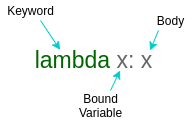

# IIFEs using lambda functions
IIFEs are <i>Immediately Invoked Function Expressions</i>. These are functions that are executed as soon as they are created. IIFEs require no explicit call to invoke the function. In Python, IIFEs can be created using the lambda function.

Here, created an IIFE that returns the cube of a number:

In [ ]:
(lambda x: x*x*x)(10)

In [ ]:
#awsome

# Application of Lambda Functions with Different Functions

created a random dataset that contains information about a family of 5 people with their id, names, ages, and income per month. I will be using this dataframe to show you how to apply lambda functions using different functions on a dataframe in Python.

In [ ]:
df=pd.DataFrame({
                'id':[1,2,3,4,5],
                'name':['Asad','Saad','Numi','Roman','Maria'],
                'age':[20,25,15,10,30],
                'income':[4000,7000,200,0,10000]})
df

# Application of Lambda with Apply

Let’s say we have got an error in the age variable. We recorded ages with a difference of 3 years. So, to remove this error from the Pandas dataframe, we have to add three years to every person’s age. We can do this with the <b>apply() function</b> in Pandas.

<b>apply() function</b>  in Pandas calls the lambda function and applies it to every row or column of the dataframe and returns a modified copy of the dataframe:

In [ ]:
df['age']=df.apply(lambda x: x['age']+3,axis='columns')  # on frame

In [ ]:
df

In [ ]:
df['age']=df['age'].apply(lambda x: x+3) #on particular series

In [ ]:
df

# Application of Lambda with Filter

Now, let’s see how many of these people are above the age of 18.

We can do this using the <b>filter() function</b>. 

The <b>filter() function</b> takes a lambda function and a Pandas series and applies the lambda function on the series and filters the data.



In [ ]:
list(filter(lambda x: x>18, df['age']))

# Application of Lambda with Map

You’ll be able to relate to the next statement. 🙂 It’s performance appraisal time and the income of all the employees gets increased by 20%. This means we have to increase the salary of each person by 20% in our Pandas dataframe.

We can do this using the map() function. This map() function maps the series according to input correspondence. It is very helpful when we have to substitute a series with other values.

In [ ]:
df['income']=list(map(lambda x: int(x+x*0.2),df['income']))

In [ ]:
df

In [ ]:
df['income2'] = df['income'].apply(lambda x: x+x*.2)

In [ ]:
df

# Conditional Statements using Lambda Functions

Lambda functions also support conditional statements, such as if..else. This makes lambda functions very powerful.

Let’s say in the family dataframe we have to categorize people into ‘Adult’ or ‘Child’. For this, we can simply apply the lambda function to our dataframe:

In [ ]:
df['category']=df['age'].apply(lambda x: 'Adult' if x>=18 else 'Child')

In [ ]:
df

# Lambda with Reduce
Now, let’s see the total income of the family. To calculate this, we can use the reduce() function in Python. It is used to apply a particular function to the list of elements in the sequence. The reduce() function is defined in the ‘functools’ module.

For using the reduce() function, we have to import the functools module first:

In [ ]:
import functools
functools.reduce(lambda a,b: a+b,df['income'])

# Summarizing and Computing Descriptive Statistics

In [ ]:
#do your self

# Correlation and Covariance

study link:https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

Example:
    

In [ ]:
import pandas_datareader.data as web

In [ ]:
# dictionary comprehension

all_data = {ticker: web.get_data_yahoo(ticker) for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

In [ ]:
price = pd.DataFrame({ticker: data['Adj Close'] for (ticker, data) in all_data.items()})


In [ ]:
volume = pd.DataFrame({ticker: data['Volume'] for (ticker, data) in all_data.items()})

In [ ]:
returns = price.pct_change()

In [ ]:
returns.tail()

In [ ]:
returns['MSFT'].corr(returns['IBM'])

In [ ]:
returns['MSFT'].cov(returns['IBM'])

DataFrame’s corr and cov methods, on the other hand, return a full correlation or
covariance matrix as a DataFrame, respectively:

In [ ]:
returns.corr()

Using DataFrame’s corrwith method, you can compute pairwise correlations
between a DataFrame’s columns or rows with another Series or DataFrame. Passing a
Series returns a Series with the correlation value computed for each column:

In [ ]:
returns.corrwith(returns.IBM)